<a href="https://colab.research.google.com/github/ArstmN/Pytorch_DL_FaraDars/blob/main/Datasets_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation with Dataset and DataLoader Modules**

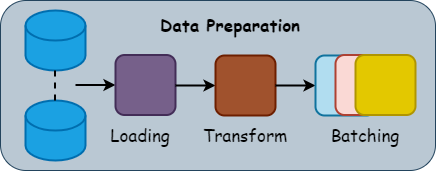



## Loading datasets 

- Torchvision Datasets: [https://pytorch.org/vision/stable/datasets.html](https://pytorch.org/vision/stable/datasets.html)

- Torchtext Datasets: [https://pytorch.org/text/stable/datasets.html](https://pytorch.org/text/stable/datasets.html)

- Torchaudio Datasets: [https://pytorch.org/audio/stable/index.html](https://pytorch.org/audio/stable/index.html)

In [ ]:
from torchvision.datasets import FashionMNIST

In [ ]:
train_data = FashionMNIST(
    root='./train',
    train=True,
    download=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./train/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./train/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./train/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./train/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./train/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/FashionMNIST/raw



In [ ]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./train
    Split: Train


In [ ]:
print(train_data.data.shape)

torch.Size([60000, 28, 28])


In [ ]:
print(train_data.targets)

tensor([9, 0, 0,  ..., 3, 0, 5])


In [ ]:
print(train_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(train_data.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
print(type(train_data[0]))

<class 'tuple'>


In [ ]:
print(len(train_data[0]))

2


In [ ]:
data, label = train_data[0]

In [ ]:
data

In [ ]:
label

9

In [ ]:
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True, 
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Visualizing FashionMNIST

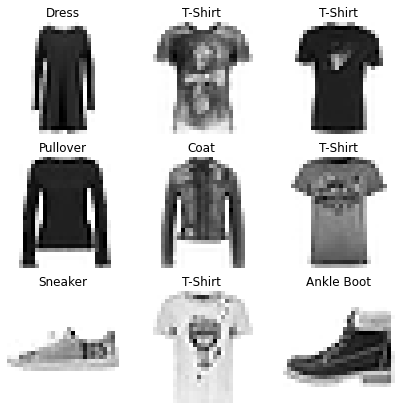

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(7, 7))

cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='binary')
plt.show()

## DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

In [ ]:
print(f"Features batch size: {train_features.size()}")
print(f"Labels shape: {train_labels.size()}")

Features batch size: torch.Size([32, 1, 28, 28])
Labels shape: torch.Size([32])


In [ ]:
image = train_features[10].squeeze()
plt.imshow(image, cmap='gray')
print(f"Label: {train_labels[10]}")

## Transforms

In [ ]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [ ]:
train_trans = transforms.Compose([transforms.RandomCrop(32, padding=4),
                                  transforms.RandomHorizontalFlip()])

cifar_train = CIFAR10(
    root="./cifar_train",
    train=True,
    download=True,
    transform=train_trans
)

Files already downloaded and verified


In [ ]:
cifar_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar_train
    Split: Train

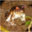

In [ ]:
cifar_train[0][0]

In [ ]:
data, label = cifar_train[0]

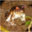

In [ ]:
data

In [ ]:
label

6

In [ ]:
cifar_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
def visualize(train_data, labels_map):
    figure = plt.figure(figsize=(7, 7))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(train_data), size=(1,)).item()
        img, label = train_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img, cmap='binary')
    plt.tight_layout()

In [ ]:
labels = {
        0: "airplane",
        1: "automobile",
        2: "bird",
        3: "cat",
        4: "deer",
        5: "dog",
        6: "frog",
        7: "horse",
        8: "ship",
        9: "truck",
    }

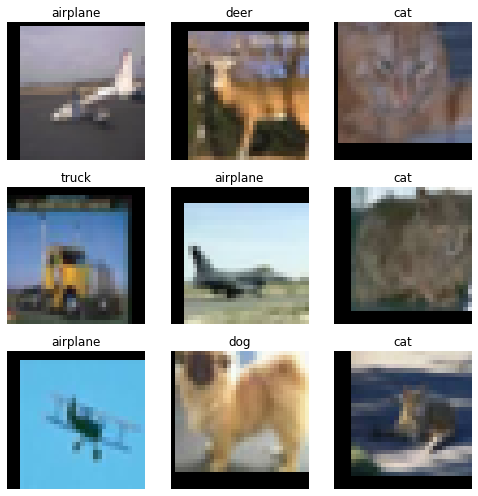

In [ ]:
visualize(cifar_train, labels)